<a href="https://colab.research.google.com/github/YipingNUS/machine-learning-labs/blob/master/lab1_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install dependencies

You can uncomment the following lines to install the missing dependencies. For the code syntax, I'll follow Python 3.

**Hint:** 

1. In Jupyter Notebook, you can select the chunk of code and press Ctrl + "/" to comment/uncomment.
2. If you're using Google Colab, most of the dependencies should have been installed for you.

In [0]:
# !pip install Pillow numpy matplotlib
# pip install -U scikit-learn
# !pip install numpy torchvision_nightly
# !pip install torch
# import torch
# torch.__version__

In [0]:
%matplotlib inline

#the usual suspects
import math
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

#use cuda 0 if available; assuming 1 gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Prerequisites

Since this is a machine learning class, we'll not teach you about numeric and visualization libraries such as numpy and matplotlib. We assume that you know them already. If not, please watch the videos of the following course (it's free).

https://www.udemy.com/course/deep-learning-prerequisites-the-numpy-stack-in-python/

# Intro to sklearn

scikit-learn or sklearn is an extremely simple and neat machine learning (ML) library in Python. It isn't the best library but it does everything very decently. Its biggest strength is that it provides a unified interface for almost all ML algorithms. Almost all (supervised) ML models implement the following two methods:

```
fit(self, X, y[, sample_weight])
predict(self, X)
```

Where `fit` method let you train a model and `predict` method let you predict on unseen instances. An example API for LinearSVC can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC). There're other methods, too. But they're much less frequently used.

A barebone example of training and prediction on a simplictic dataset is as follows:

In [0]:
from sklearn import svm
X = [[0, 0], [1, 1]]  # X is the data, which is a list of feature vectors
y = [0, 1] # y is the one-hot encoded label
clf = svm.LinearSVC()
clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
clf.predict([[2., 2.]])

array([1])

As you can see, the biggest advantage (and disadvantage) of `sklearn` is that you don't have to know what `svm` is to train an SVM successfully. All you need to know is that it's a classification algorithm and what the input format is.

Therefore, it's perfect to build fast prototypes and compare different competing algorithms (often with the change of a single line of code). However, it's very bad for pedagogical purpose since you won't have experience with the underlying implementation such as the cost functions and optimizers. That's why in this lab, you'll try to build the same model using sklearn and a deep learning library from scratch.

### Task 1: line fitting using linear regression with sklearn (5 marks)

In [0]:
#input x is some random numbers between 0 and 1
batch_size = 100
#x = torch.rand(batch_size,1,requires_grad=True) 
x = np.random.uniform(0,1,batch_size)

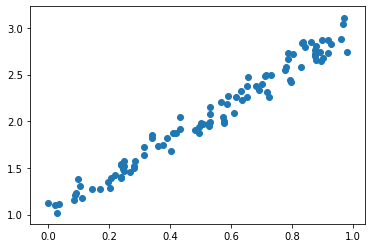

In [54]:
#create our own y_true as identity relationship to x with some random noise
y_true = 2*x + np.random.normal(1, 0.1, batch_size)
plt.scatter(x,y_true)

**Hint:**

In Jupyter notebook, you can type ? after a method to show the method definition and ?? after a method to view the source code. E.g.

In [0]:
np.random.normal?

In linear regression, you have the following general form:

$$y_{pred} = Wx + b$$

where $W$ is the weight and $b$ is the bias. Let's try a random $W$ and $b$ and compare the prediction with the true value:

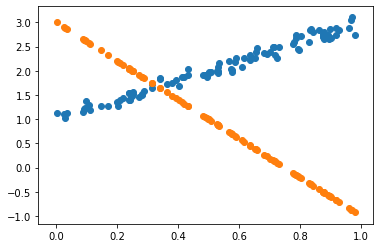

In [55]:
W=-4; b=3
y_pred = W*x + b
plt.scatter(x,y_true)
plt.scatter(x,y_pred)

Pretty bad as we expected. Now it's your turn to fit a linear regression model using sklearn. You needs to do the following as well:

1. Find the suitable sklearn model for this problem.
2. Check what's the cost function used.
3. Report the loss before and after training.
4. Plot the prediction and the true value like the graph above.

In [0]:
# TODO: your code here


# Intro to PyTorch

In contrast to `Sklearn`, `PyTorch` gives you much more flexibility to implement the model from scratch. Thus, it's much harder to master it. In this section we'll first go through the basic concepts in `PyTorch` and then you'll implement the same model above using `PyTorch`.

## Tensors
A fancy way of saying n-dimensional vector/matrix.

* Vector: one-dimensional tensor
* Matrix: two-dimensional tensor

In [7]:
#only zeros
torch.zeros(10)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
#only ones
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [10]:
#normal random, useful for initialization
torch.randn(1,2,3,4)

tensor([[[[-0.3922,  0.7812, -1.7366, -1.4855],
          [-0.2282, -0.9623,  0.4913,  1.7943],
          [ 0.8969, -1.4181, -1.6351,  0.8198]],

         [[-0.4729,  0.1592,  1.4504,  0.5713],
          [ 0.7981, -0.7173,  0.4862,  1.0923],
          [-0.3470, -0.3581,  1.7093,  0.7521]]]])

In [11]:
# Torch tensors can be easily converted to/from Python list or numpy arrays
#from list
torch.tensor([[1,2,3],[4,5,6],[7,8,9]], dtype=torch.float64)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)

In [12]:
#from numpy
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = torch.from_numpy(a)
b

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

**IMPORTANT:** when creating tensor from a numpy array, torch only creates a reference. So if you modify the original numpy array, the `tensor` will be modified as well. 

In [14]:
a[1,1] = 0
b

tensor([[1, 2, 3],
        [4, 0, 6],
        [7, 8, 9]])

Sometimes, you want to convert the tensor to numpy array for visualization or evaluation, it can be done using the `.numpy()` method.

In [15]:
#to numpy
b.numpy()

array([[1, 2, 3],
       [4, 0, 6],
       [7, 8, 9]])

### Size and shape

In [16]:
#size, shape, device
a = torch.randint(low = 0, high = 10, size = (3,3))
print(a.shape, a.size(), a.dtype, a.device)
a

torch.Size([3, 3]) torch.Size([3, 3]) torch.int64 cpu


tensor([[2, 1, 7],
        [8, 3, 8],
        [6, 7, 7]])

In [17]:
#unsqueeze
b = a.unsqueeze(2).unsqueeze(3)
b.shape

torch.Size([3, 3, 1, 1])

In [18]:
#squeeze
b.squeeze(2).shape

torch.Size([3, 3, 1])

In [19]:
a.reshape(1,-1)

tensor([[2, 1, 7, 8, 3, 8, 6, 7, 7]])

In [20]:
#transpose
print(f'Original tensor:\n{a}')
print(f'Transposed tensor:\n{a.transpose(0,1)}')

Original tensor:
tensor([[2, 1, 7],
        [8, 3, 8],
        [6, 7, 7]])
Transposed tensor:
tensor([[2, 8, 6],
        [1, 3, 7],
        [7, 8, 7]])


In [21]:
#concatenate. my rule of thumb, always specify the dimention to concatenate.
a = torch.zeros(1,3,5,5)
b = torch.ones(1,3,5,5)
c = torch.randn(1,3,5,5)
torch.cat((a,b,c), dim=1).shape

torch.Size([1, 9, 5, 5])

### Tensor operations

In [22]:
a = torch.tensor([[1,2,3],[4,5,6],[7,8,9]], dtype=torch.float64)
b = torch.eye(3,3, dtype = torch.float64)
c = torch.tensor([[1],[0],[1]], dtype = torch.float64)
print(a)
print(b)
print(c)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)
tensor([[1.],
        [0.],
        [1.]], dtype=torch.float64)


In [23]:
#add/subtract
a+b

tensor([[ 2.,  2.,  3.],
        [ 4.,  6.,  6.],
        [ 7.,  8., 10.]], dtype=torch.float64)

In [24]:
#element-wise multiply/divide
a*b

tensor([[1., 0., 0.],
        [0., 5., 0.],
        [0., 0., 9.]], dtype=torch.float64)

In [25]:
#dot product
a@c

tensor([[ 4.],
        [10.],
        [16.]], dtype=torch.float64)

### Broadcasting

Read [the note](https://pytorch.org/docs/stable/notes/broadcasting.html) to learn about broadcasting. In short, 

Two tensors are “broadcastable” if the following rules hold:

* Each tensor has at least one dimension.
* When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

In [28]:
a = torch.tensor([[1,2,3],[4,5,6],[7,8,9]], dtype=torch.float64)
b = torch.tensor([[1],[0],[1]], dtype = torch.float64)
print(a)
print(b)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
tensor([[1.],
        [0.],
        [1.]], dtype=torch.float64)


In [29]:
a+b

tensor([[ 2.,  3.,  4.],
        [ 4.,  5.,  6.],
        [ 8.,  9., 10.]], dtype=torch.float64)

In [30]:
a+b.reshape(1,-1)

tensor([[ 2.,  2.,  4.],
        [ 5.,  5.,  7.],
        [ 8.,  8., 10.]], dtype=torch.float64)

## Layers: The building block of deep learning models

In [31]:
# create some fake input data
batch_size = 5
input_size = 7
output_size = 3
x = torch.randn(batch_size, input_size)
x

tensor([[-2.0054,  0.3960,  0.4362,  0.6358, -0.7697,  0.5745, -0.5309],
        [ 1.0183, -2.9105,  0.0443,  0.7112, -0.1393, -0.6230, -0.5627],
        [ 0.5264,  0.6796,  0.1308, -0.3560,  0.7193, -0.0425, -1.6154],
        [ 1.8244, -0.9294,  0.5479,  1.6286, -0.2351,  0.5589,  1.2200],
        [-0.0688,  1.1711,  0.3270, -0.2784,  0.3522,  0.0350,  1.1644]])

### Linear Layer

A linear layer performs the following operation:

$$y = xW^T + b$$

where:
* `y` is the output (`batch_size` * `output_size`)
* `x` is the input (`batch size` * `input_size`)
* `W` is the weight for linear transformation (`output_size` * `input_size`)
* `b` is the bias for linear transformation (`output_size`)

In [32]:
#pytorch magic
m = nn.Linear(input_size,output_size,bias=True)
output = m(x)
print(output.shape)
output

torch.Size([5, 3])


tensor([[ 0.8236,  0.1035, -0.3802],
        [ 0.5886, -0.5821,  0.8810],
        [ 0.3963, -0.3277, -0.1276],
        [-0.7169, -0.6116,  0.5273],
        [-0.3887, -0.4834,  0.5324]], grad_fn=<AddmmBackward>)

### Activation 

Unlike the linear layer, activation layers perfrom some mapping operations on your input.Notice that since they do not usually have a set of tensors as weights so we do not need to keep track of them.

#### Rectified Linear Unit (ReLU)

$$f(x) = max(0,x)$$

The default activation function for deep neural networks (all layers except for the final layer).

In [34]:
torch.relu(x)

tensor([[0.0000, 0.3960, 0.4362, 0.6358, 0.0000, 0.5745, 0.0000],
        [1.0183, 0.0000, 0.0443, 0.7112, 0.0000, 0.0000, 0.0000],
        [0.5264, 0.6796, 0.1308, 0.0000, 0.7193, 0.0000, 0.0000],
        [1.8244, 0.0000, 0.5479, 1.6286, 0.0000, 0.5589, 1.2200],
        [0.0000, 1.1711, 0.3270, 0.0000, 0.3522, 0.0350, 1.1644]])

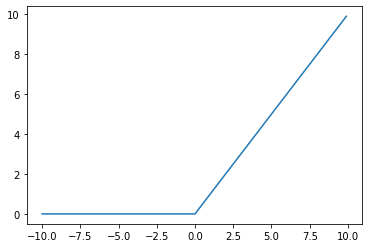

In [35]:
#visualization
inp = torch.arange(-10, 10, 0.1)
outp = torch.relu(inp)
plt.plot(inp.numpy(),outp.numpy())

#### Sigmoid

$$f(x) = \frac{1}{1 + e^{-x}}$$

Useful for binary and multi-label classification.

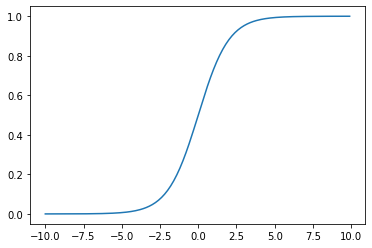

In [36]:
inp = torch.arange(-10, 10, 0.1)
outp = torch.sigmoid(inp)
plt.plot(inp.numpy(),outp.numpy())

#### Softmax

$$f(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$$

where $i$ is the current class and $j$ is any class.

Useful for multi-class classification.

In [37]:
print(x.shape) #batch_size x output_size
torch.softmax(x, dim = 1) #dim is class/feature dimension

torch.Size([5, 7])


tensor([[0.0171, 0.1885, 0.1962, 0.2396, 0.0587, 0.2253, 0.0746],
        [0.3513, 0.0069, 0.1326, 0.2584, 0.1104, 0.0681, 0.0723],
        [0.1942, 0.2264, 0.1308, 0.0804, 0.2355, 0.1100, 0.0228],
        [0.3204, 0.0204, 0.0894, 0.2634, 0.0409, 0.0904, 0.1751],
        [0.0780, 0.2696, 0.1159, 0.0633, 0.1189, 0.0866, 0.2678]])

In [41]:
# To validate, the probs of each row adds up to 1
torch.sum(torch.softmax(x, dim = 1), dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

## Your First PyTorch Model

A typical neural networks has three components: an **architecture**, a **loss**, and an **optimizer**. 

An **architecture** is a collection of layers that are usually initiated with random weights. When a batch of input tensors is fed into the architecture, it is called **feedforward**. The output is another batch of predicted tensors.

We compare the predicted tensors with ground truth and describe the discrepancy by an arbitrary **loss function**.

The **optimizer** then calculates the derivatives of the loss function called **gradients** in order to update the weights of the architecture to minimize the loss (discrepancies between prediction and ground truth). The loss is thus **backpropagated** from the loss function, through the output layer, all the way up to the input layer using [Chain Rule](https://en.wikipedia.org/wiki/Chain_rule).

As time goes on, the loss will become smaller and our neural network architecture will make a prediction that better reflects our dataset.

In [42]:
batch_size = 5
input_size = 7
output_size = 3
x = torch.randn(batch_size, input_size)
x

tensor([[ 0.5237,  1.2278, -0.6611,  1.4849, -0.9323,  0.9780, -0.8792],
        [-0.9277,  0.4641, -0.4038,  0.2590,  1.3126, -0.3670, -0.8239],
        [-0.0137,  0.8449,  1.0635,  0.1989, -0.0121,  1.8876, -0.7460],
        [-0.5273,  0.5964,  0.6055,  0.5183, -0.3493,  1.8640, -1.6439],
        [ 0.1435, -0.6405,  0.4126, -0.0158,  0.1180, -1.4260,  0.8325]])

### Architecture and Feedforward

In [0]:
class SimpleNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size,output_size)
    def forward(self,x):
        return(torch.sigmoid(self.fc1(x)))

In [44]:
m = SimpleNet(7,3)
m(x)

tensor([[0.4508, 0.2648, 0.4328],
        [0.3674, 0.6810, 0.3954],
        [0.2851, 0.3169, 0.3797],
        [0.3310, 0.2992, 0.3511],
        [0.4714, 0.6132, 0.6383]], grad_fn=<SigmoidBackward>)

### Loss

A loss function is a fuction that takes in your model output and compares it with ground truth. It describes the discrepancies between your predictions and ground truth, either in terms of labels (classification), numbers (regression), similarities (clustering).

I won't go through much details. Please read [this article](https://medium.com/udacity-pytorch-challengers/a-brief-overview-of-loss-functions-in-pytorch-c0ddb78068f7) by yourself. Note that not all the losses are often used. I usually use `torch.nn.MSELoss` for regression and `torch.nn.NLLLoss` or `torch.nn.CrossEntropyLoss` for classification and that's it.

### Back Propagation

Neural networks rely on a process called **backpropagation** in order to adjust their weights from random ones to ones that minimize the loss. 

Since it's a hands-on lab, we'll skip the math part and use directly a prebuilt optimizer instead of implementing `SGD` from scratch. The general procedure is outlined below:

```
# define the model
m = SimpleNet(7,3)
y_pred = m(x)

loss_func = nn.MSELoss()
optimizer = optim.SGD(m.parameters(), lr = 0.1)
```



In [0]:
def train():
    #feedforward
    y_pred = m(x)
    
    #calculate loss
    loss = loss_func(m(x),y_true)
    
    #reset gradients to zero
    optimizer.zero_grad()
    
    #backpropagate
    loss.backward()
    
    #update weights
    optimizer.step()

For most real-world problems, you probably need to iterate through your dataset multiple times to sufficiently learn the model, you can do this by simply calling the training method multiple times.

In [0]:
#training
nb_epoch = 100
for i in trange(nb_epoch): train()

### Task 2: line fitting using linear regression with pytorch (5 marks)

Same requirement as the exercise using sklearn

In [0]:
#input x is some random numbers between 0 and 1
batch_size = 100
x = torch.rand(batch_size,1,requires_grad=True) 

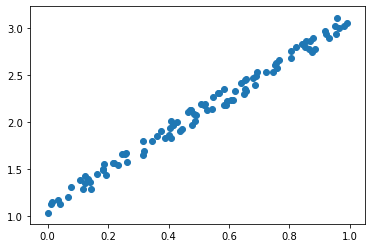

In [58]:
#create our own y_true as identity relationship to x with some random noise
y_true = 2*x + torch.rand(batch_size,1).div_(5) + 1
y_true = y_true.detach()
plt.scatter(x.detach().numpy(),y_true.numpy())

In [0]:
# TODO: your answer
